# Machine Learning for Regression

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [262]:

SEED = 2
FEATURES = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [263]:
df = pd.read_csv('../data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [264]:
# make columns the same type
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [265]:
# also make columns as object type the same type
object_columns = df.dtypes[df.dtypes=='object'].index
for col in object_columns:
    df[col] = df[col].str.lower().replace(' ', '_')
# df[object_columns] = df[object_columns].applymap(lambda x: str(x).lower().replace(' ', '_'))
#  this comment instruction is wrong because into lambda function convert null values into ' ' (str(x)) and then replaced on '_'
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA (Exploratory Data Analysis)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [267]:
df.describe(include='all').round(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,11914,11914,11914.00,11911,11845.00,11884.00,11914,11914,11908.00,8172,11914,11914,11914.00,11914.00,11914.00,11914.00
unique,48,914,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,chevrolet,silverado 1500,NaN,regular unleaded,NaN,NaN,automatic,front wheel drive,NaN,crossover,compact,sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.38,NaN,249.39,5.63,NaN,NaN,3.44,NaN,NaN,NaN,26.64,19.73,1554.91,40594.74
std,NaN,NaN,7.58,NaN,109.19,1.78,NaN,NaN,0.88,NaN,NaN,NaN,8.86,8.99,1441.86,60109.10
min,NaN,NaN,1990.00,NaN,55.00,0.00,NaN,NaN,2.00,NaN,NaN,NaN,12.00,7.00,2.00,2000.00
25%,NaN,NaN,2007.00,NaN,170.00,4.00,NaN,NaN,2.00,NaN,NaN,NaN,22.00,16.00,549.00,21000.00
50%,NaN,NaN,2015.00,NaN,227.00,6.00,NaN,NaN,4.00,NaN,NaN,NaN,26.00,18.00,1385.00,29995.00
75%,NaN,NaN,2016.00,NaN,300.00,6.00,NaN,NaN,4.00,NaN,NaN,NaN,30.00,22.00,2009.00,42231.25


Выводы по колонкам:
- `make`
  - ...
- `model`
  - ...
- `year`
  - данные с 1990 по 2017 годы
- `engine_fuel_type`
  - есть пропущенные значения (3)
- `engine_hp`
  - есть пропущенные значения (69)
- `engine_cylinders`
  - ...
  - есть пропущенные значения (30)
- `transmission_type`
  - ...
- `driven_wheels`
  - ...
- `number_of_doors`
  - есть пропущенные значения (6)
- `market_category`
  - есть много пропущенных значений (3742)
- `vehicle_size`
  - ...
- `vehicle_style`
  - ...
- `highway_mpg`
  - ...
- `city_mpg`
  - ...
- `popularity`
  - довольно большой разброс между мин(2) и макс(5'657) значениями
- `msrp`
  - огромный разброс между мин(2'000) и макс(2'065'902) значениями

In [268]:
df.select_dtypes(include='number').columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

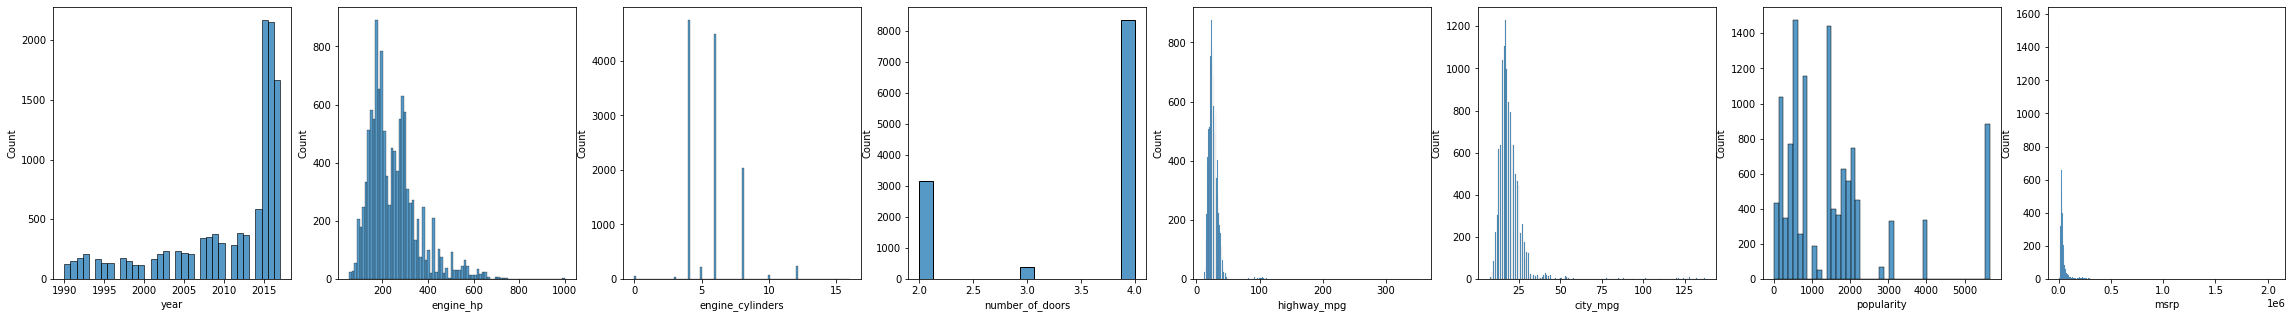

In [269]:
number_columns = df.select_dtypes(include='number').columns
fig, axs = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(5*len(number_columns), 5))
for col_idx in range(len(number_columns)):
    sns.histplot(df[number_columns[col_idx]], ax=axs[col_idx])
plt.show()

<AxesSubplot:xlabel='msrp', ylabel='Count'>

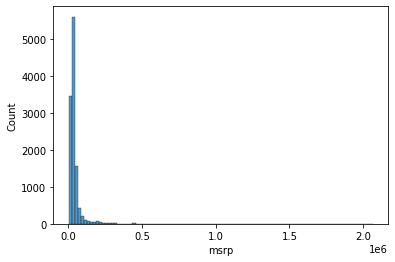

In [270]:
sns.histplot(df.msrp, bins=100)

В обычном виде распределение цены за авто не совсем пригодно для дальнейшей работы, т.к. очень большой выпад от значений наибольшей частоты с ценами (в районе 50 тыс.) и максимальным значением (в районе 2 млн.). Для исправления ситуации попробуем отобразить данные в логарифмической шкале. В логарифмической шкале есть ограничение - значения должны быть больше 0. Что бы обойти его, есть вспомогательная функция, которая добавляет 1 ко всем значениям, что практически ни как не сказывается на показателе линейки и обходит ограничение с 0

In [271]:
print(np.log([1, 10, 100, 1000, 1000000]))
print('used `np.log`')
print(np.log([0, 1, 10, 100, 1000, 1000000]))
print('used `np.log1p`')
print(np.log1p([0, 1, 10, 100, 1000, 1000000]))


[ 0.          2.30258509  4.60517019  6.90775528 13.81551056]
used `np.log`
[       -inf  0.          2.30258509  4.60517019  6.90775528 13.81551056]
used `np.log1p`
[ 0.          0.69314718  2.39789527  4.61512052  6.90875478 13.81551156]


C:\Users\mrdef\AppData\Local\Temp\ipykernel_24264\4018541423.py:3: RuntimeWarning: divide by zero encountered in log
  print(np.log([0, 1, 10, 100, 1000, 1000000]))


<AxesSubplot:xlabel='msrp', ylabel='Count'>

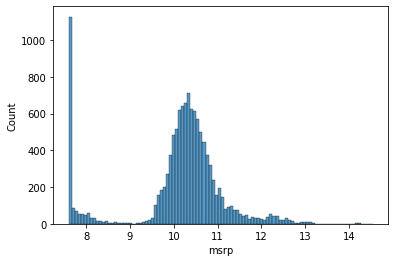

In [272]:
sns.histplot(np.log1p(df.msrp), bins=100)

в таком варианте данные очень похожи на нормальное распределение (в виде колокола) - при нормальном распределении target означает практически идеальную ситуацию для обучения модели, что сделает предсказания более качественными 

<AxesSubplot:xlabel='year', ylabel='make'>

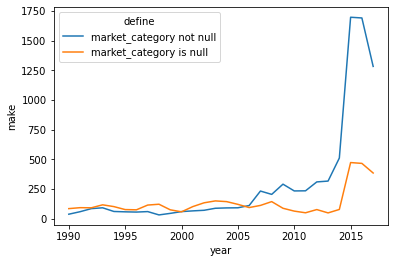

In [273]:
tst_df = df.groupby([df['year'], df['market_category'].isnull()])['make'].count().reset_index()
tst_df['define'] = tst_df['market_category'].map({False: 'market_category not null', True: 'market_category is null'})
tst_df.head()
sns.lineplot(x='year', y='make', hue='define', data=tst_df)

### Fill Nullable values

In [275]:
df[FEATURES] = df[FEATURES].fillna(0).values

In [276]:
df[FEATURES].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

## Setting Up The Validation Framework 
(настройка окружения валидации)

Весь набор данных необходимо разделить на 3 части: 1-обучение, 2 - валидация, 3 - тестирование 
Приеме следующее соотношение для частей: 1-60%, 2-3 по 20% каждая


In [280]:
n = df.index.size
n_val = n_test = int(n * .2)
n_train = n - n_val - n_test
n, n_train, n_test, n_val, n == n_train + n_val + n_test

(11914, 7150, 2382, 2382, True)

Если брать срезы наборов данных как есть, `df.iloc[:n]` то этот подход имеет ряд недостатков:
- в какой либо из частей будет ярко выражены значения какой-либо фичи, а в других значения могут быть отсутствовать вовсе
- набор значений по фичам желательно делать однородными, а исходный набор данных мог быть изначально отсортирован по определенным атрибутам, например по дате - т.о. в наборе данных для обучения будут старые, или новые, данные, а в частях валидации и теста наоборот - что не даст релевантности. 

Что бы исключить эти недостатки, необходимо перемешать данные, либо индексы по которым будут извлекаться данные для разбивки по частям

In [281]:
arr = np.arange(10)
shuffle_arr = arr.copy()
for _ in range(5):
    np.random.shuffle(shuffle_arr)
    print(f"{arr=}, {shuffle_arr=}")

arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([1, 6, 0, 2, 3, 9, 7, 8, 4, 5])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([3, 5, 9, 1, 4, 6, 0, 7, 8, 2])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([6, 2, 8, 3, 9, 5, 1, 7, 0, 4])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([5, 3, 0, 1, 7, 6, 2, 4, 9, 8])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([6, 7, 1, 2, 0, 5, 3, 4, 9, 8])


при каждом вызове инструкции `np.random.shuffle(...)`, массив будет перемешен случайным образом. Для воспроизводимости экспериментов это поведение не подходит. Что бы обеспечить воспроизводимость экспериментов необходимо зафиксировать `seed` - т.о. генератор случайных чисел будет выдавать одну и ту же последовательность, не зависимо от того где исполняется код.

In [282]:
arr = np.arange(10)
for _ in range(5):
    shuffle_arr = arr.copy()
    np.random.seed(SEED)
    np.random.shuffle(shuffle_arr)
    print(f"{arr=}, {shuffle_arr=}")

arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([4, 1, 5, 0, 7, 2, 3, 6, 9, 8])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([4, 1, 5, 0, 7, 2, 3, 6, 9, 8])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([4, 1, 5, 0, 7, 2, 3, 6, 9, 8])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([4, 1, 5, 0, 7, 2, 3, 6, 9, 8])
arr=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), shuffle_arr=array([4, 1, 5, 0, 7, 2, 3, 6, 9, 8])


In [283]:
# split original dataset into 3-th parts: train, validation & test
idx = list(range(n))
np.random.seed(SEED)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_test:]]

# check number of values
print(f'{len(df)}, {len(df_train) == n_train=}, {len(df_val) == n_val=}, {len(df_test) == n_test=}')

# save index into new column
for _df in [df_train, df_val, df_test]:
    _df.reset_index(inplace=True)
    print()
    print(_df.head().iloc[:,:5])

11914, len(df_train) == n_train=True, len(df_val) == n_val=True, len(df_test) == n_test=True

   index        make    model  year          engine_fuel_type
0   2735   chevrolet   cobalt  2008          regular unleaded
1   6720      toyota   matrix  2012          regular unleaded
2   5878      subaru  impreza  2016          regular unleaded
3  11190  volkswagen  vanagon  1991          regular unleaded
4   4554        ford    f-150  2017  flex-fuel (unleaded/e85)

   index           make               model  year  \
0   2779      chevrolet            colorado  2015   
1   3708  mercedes-benz             e-class  2017   
2   4794           ford               focus  2017   
3  10498          acura                 tlx  2016   
4   1880     volkswagen  beetle convertible  2016   

                 engine_fuel_type  
0                regular unleaded  
1     premium unleaded (required)  
2        flex-fuel (unleaded/e85)  
3  premium unleaded (recommended)  
4                regular unleaded 

In [284]:
# extract `target` from each parts of dataset as logarithmic scale
y_train = np.log1p(df_train .pop('msrp'))
y_val = np.log1p(df_val .pop('msrp'))
y_test = np.log1p(df_test .pop('msrp'))

In [285]:
print(len(y_train), y_train[:5].values, df_train.columns.values, '\n')
print(len(y_val), y_val[:5].values, df_val.columns.values, '\n')
print(len(y_test), y_test[:5].values, df_test.columns.values, '\n')

7150 [ 9.57574708  9.887663    9.89323518  7.60140233 10.93775686] ['index' 'make' 'model' 'year' 'engine_fuel_type' 'engine_hp'
 'engine_cylinders' 'transmission_type' 'driven_wheels' 'number_of_doors'
 'market_category' 'vehicle_size' 'vehicle_style' 'highway_mpg' 'city_mpg'
 'popularity'] 

2382 [10.19936098 10.90872279  9.72770457 10.65963301 10.16569796] ['index' 'make' 'model' 'year' 'engine_fuel_type' 'engine_hp'
 'engine_cylinders' 'transmission_type' 'driven_wheels' 'number_of_doors'
 'market_category' 'vehicle_size' 'vehicle_style' 'highway_mpg' 'city_mpg'
 'popularity'] 

2382 [ 7.60140233  8.07464908 10.34563811  7.60140233 10.30581441] ['index' 'make' 'model' 'year' 'engine_fuel_type' 'engine_hp'
 'engine_cylinders' 'transmission_type' 'driven_wheels' 'number_of_doors'
 'market_category' 'vehicle_size' 'vehicle_style' 'highway_mpg' 'city_mpg'
 'popularity'] 



<AxesSubplot:xlabel='msrp', ylabel='Count'>

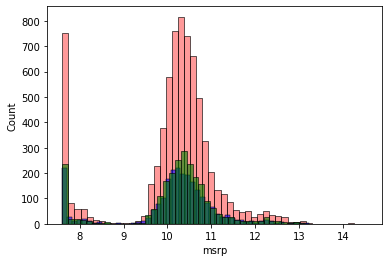

In [310]:
sns.histplot(y_train, color='red', alpha=.4, bins=50)
sns.histplot(y_val, color='blue', alpha=.6, bins=50)
sns.histplot(y_test, color='green', alpha=.6, bins=50)

## Linear Regression

$$ g(x_i) = w_0 + \sum_{j=0}^{n-1}{w_j*x_{ij}}$$

- $x_i$ - factors of model, features for some $i$ object (car in our example) 
- $n$ - number of factors
- $w$ - weights, parameters|coefficients of regression 


for example `df_train.iloc[10]`:
```
index                                       7557
make                                 rolls-royce
model                     phantom drophead coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
```
in our features we include: `engine_hp`, `city_mpg`, `popularity`
$$x_{10} =  \begin{bmatrix} 453 & 11 & 86 \end{bmatrix}$$
$$ g(x_{10}) = w_0 + w_1*453 + w_2*11 + w_3*86$$




In [286]:
def base_linear_regression(xi):
    pred = w0
    n = len(xi)
    for j in range(n):
        pred += w[j] * xi[j]
    return pred

In [290]:
xi = df_train.iloc[10][FEATURES].values.tolist()
w0 = 7.17
w = [.01, .04, .002, .001, .004]
print(f"{xi=}, {w0=}, {w=}")
print(f"{base_linear_regression(xi) = }")

xi=[453.0, 12.0, 19.0, 11.0, 86.0], w0=7.17, w=[0.01, 0.04, 0.002, 0.001, 0.004]
base_linear_regression(xi) = 12.572999999999999


our function return logarithmic values (`np.log1p`), because early we convert prices to logarithmic scale. To convert from logarithmic value to natural value we must power exponent by return value $m = log(n), n = \exp^m$, or call `np.expm1`

In [291]:
print(f"{np.expm1(base_linear_regression(xi)) = }")

np.expm1(base_linear_regression(xi)) = 288657.6133033345


## Linear Regression: Vector Form


$$ g(x_i) = w_0 + \sum_{j=0}^{n-1}{w_j*x_{ij}} = w_0 + x_i^T*w = x_i^T*W = W^T * x_i$$

- $x_i$ - factors of model, features for some $i$ object (car in our example) 
- $n$ - number of factors
- $w$ - weights, parameters|coefficients of regression 
- $W = \begin{bmatrix} w_0 & w_1 & w_2 & ... & w_n \end{bmatrix}$  
- $x_i = \begin{bmatrix} x_0 & x_1 & x_2 & ... & x_n \end{bmatrix} \rightarrow x_0 = 1$


In [292]:
def dot(x, w):
    print(f"{x=}, {w=}")
    n = len(x)
    res = 0
    for j in range(n):
        res += x[j] * w[j]
    return res


def vector_linear_regression(xi, W):
    x = [1] + xi
    return dot(x, W)

In [293]:
W = [w0] + w
vector_linear_regression(xi, W)

x=[1, 453.0, 12.0, 19.0, 11.0, 86.0], w=[7.17, 0.01, 0.04, 0.002, 0.001, 0.004]


12.572999999999999

In [294]:
def np_vector_linear_regression(x, w):
    x, w = map(np.array, ([1] + x, w))
    return x.T.dot(w)

In [295]:
np_vector_linear_regression(xi, W)

12.572999999999999

consider big picture for X matrix

In [296]:
df_train.iloc[[0,1,10]][FEATURES]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33.0,24.0,1385.0
1,132.0,4.0,32.0,25.0,2031.0
10,453.0,12.0,19.0,11.0,86.0


$$ X = \left|   \begin{array}{ccc}  
      1 & x_0 \\
      1 & x_1 \\
      1 & x_{10}
  \end{array}
\right| =
 \left|
  \begin{array}{ccc}  
      1 & 148 & 24 & 1385  \\
      1 & 132 & 25 & 2031 \\
      1 & 453 & 11 &   86 
  \end{array}
\right|, 
W = \left|   \begin{array}{ccc}  
      7.17 & 0.01 & 0.04 & 0.002
  \end{array}
\right| 
$$

$$ {\large g_{\texttt{linear-regression}}(X) = X \cdot W}$$

In [297]:
def linear_regression(X, W):
    # assert (X[:, 0] == np.ones(X.shape[0])).all() == True, "'X[:,0]' is not ones matrix"
    w0 = W[0]
    w = W[1]
    return  w0 + X.dot(w)

In [298]:
def add_leading_ones(X: np.array) -> np.array:
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

In [299]:
X = add_leading_ones(df_train.iloc[[0,1,10]][features].values)
linear_regression(X, W)

array([[ 7.18,  8.65,  7.41, 21.02],
       [ 7.18,  8.49,  7.42, 27.48],
       [ 7.18, 11.7 ,  7.28,  8.03]])

## Training Linear Regression: Normal Equation

The problem at this step is a define how to calculate weight for regression matrix **W**

$$ {\large g(X) = y_\texttt{target} \Leftrightarrow  X \cdot W = y_\texttt{target}}$$

$$ X \cdot W = y_\texttt{target} \Leftrightarrow  \\
X^T \cdot X \cdot W = X^T \cdot y_\texttt{target} \Leftrightarrow  \\
(X^T \cdot X)^{-1} \cdot X^T \cdot X \cdot W = (X^T \cdot X)^{-1} \cdot X^T \cdot y_\texttt{target} \Leftrightarrow  \\
(X^T \cdot X)^{-1} \cdot X^T \cdot X = E \Rightarrow \\
E \cdot W = (X^T \cdot X)^{-1} \cdot X^T \cdot y_\texttt{target} \Leftrightarrow \\
E \cdot W = W \Rightarrow \\
$$
$$ {\large W = (X^T \cdot X)^{-1} \cdot X^T \cdot y_\texttt{target}}$$ 

- $X^{-1}$ - inverted matrix of $X$
- $E$ - identity matrix


In [300]:
def train_linear_regression(X: np.array, y):
    X = add_leading_ones(X)
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # print(XTX.dot(XTX_inv).round())
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [309]:
# idx = [0, 1, 10, 11, 12, 13, 14, 15, 16]
idx = df_train.index
X = df_train.iloc[idx][FEATURES].values
# X_full = add_leading_ones(X)
y = y_train[idx].values
print(f"{y=}")
W = train_linear_regression(X, y)
print(f"{W=}")
y_predict = linear_regression(X, W) 

print(f'{y_predict=}')
print()


y=array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])
W=(7.927257388069986, array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06]))
y_predict=array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])



<AxesSubplot:xlabel='msrp', ylabel='Count'>

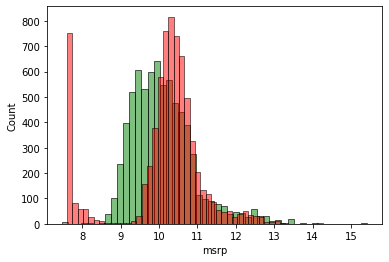

In [308]:
sns.histplot(y_predict, color='green', alpha =.5, bins=50)
sns.histplot(y_train, color='red', alpha =.5, bins=50)

In [318]:
len(y_predict), len(y_train)

(7150, 7150)

## RMSE (Root Mean Squared Error)

In [314]:
def rmse(y_train, y_pred):
    m = len(y_pred)
    y = y_pred - y_train    
    rmse = np.sqrt(np.sum(y**2)/m)
    return rmse

In [315]:
rmse(y_train=y_train, y_pred=y_predict)

0.7554192603920132

In [316]:
def rmse2(y_train, y_pred):
    error = y_train - y_pred
    se = error ** 2 
    mse = se.mean()
    return np.sqrt(mse)

In [317]:
rmse2(y_train=y_train, y_pred=y_predict)

0.7554192603920132

In [313]:
np.array([1,2,3,4])**2

array([ 1,  4,  9, 16])

In [302]:
# np.column_stack(([wo], W))
np.hstack((123, W))

c:\Users\mrdef\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


array([123, 7.411803201566269,
       array([ 7.99499073e-03,  3.71204433e-02, -1.51947315e-05])],
      dtype=object)

In [303]:
np.linalg.inv(X.T.dot(X))

array([[ 5.09028449e-09, -3.47720112e-08, -2.05195573e-10],
       [-3.47720112e-08,  7.65840367e-07, -2.23121399e-09],
       [-2.05195573e-10, -2.23121399e-09,  6.47959879e-11]])

In [321]:
df.columns[df.isnull().sum() > 0]

Index(['engine_fuel_type', 'number_of_doors', 'market_category'], dtype='object')